<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/MSDS_451_A2_Normality_and_serial_autocorrelation_of_various_returns_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import bz2
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


import seaborn as sns
sns.set()
import datetime as dt
from matplotlib.pyplot import figure

import mplfinance as mpf




In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W2"

total 59352
-rw------- 1 root root  7298524 Jan 22 00:25 AAPL_1Min.csv
-rw------- 1 root root  7936283 Jan 22 00:25 AAPL_dollar_bars_3300000.csv
-rw------- 1 root root 31287079 Jan 26 06:29 AAPL_raw_tick_data.bz2
-rw------- 1 root root  7577619 Jan 22 00:25 AAPL_tick_bars_100.csv
-rw------- 1 root root  6675366 Jan 22 00:25 AAPL_volume_bars_22000.csv


In [ ]:
w2_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W2"

In [ ]:
df1min = pd.read_csv(w2_files+"/AAPL_1Min.csv")
df1min.shape
df1min.head(10)

df1min.dtypes


(235533, 3)

,date_time,price,volume
0,2019-01-02 04:01:00,154.00,2520
1,2019-01-02 04:02:00,154.00,100
2,2019-01-02 04:03:00,154.00,0
3,2019-01-02 04:04:00,154.00,200
4,2019-01-02 04:05:00,154.00,437
5,2019-01-02 04:06:00,154.00,1187
6,2019-01-02 04:07:00,153.80,1010
7,2019-01-02 04:08:00,153.99,500
8,2019-01-02 04:09:00,154.00,800
9,2019-01-02 04:10:00,154.00,0


date_time     object
price        float64
volume         int64
dtype: object

## Question 1

<Figure size 2240x960 with 0 Axes>

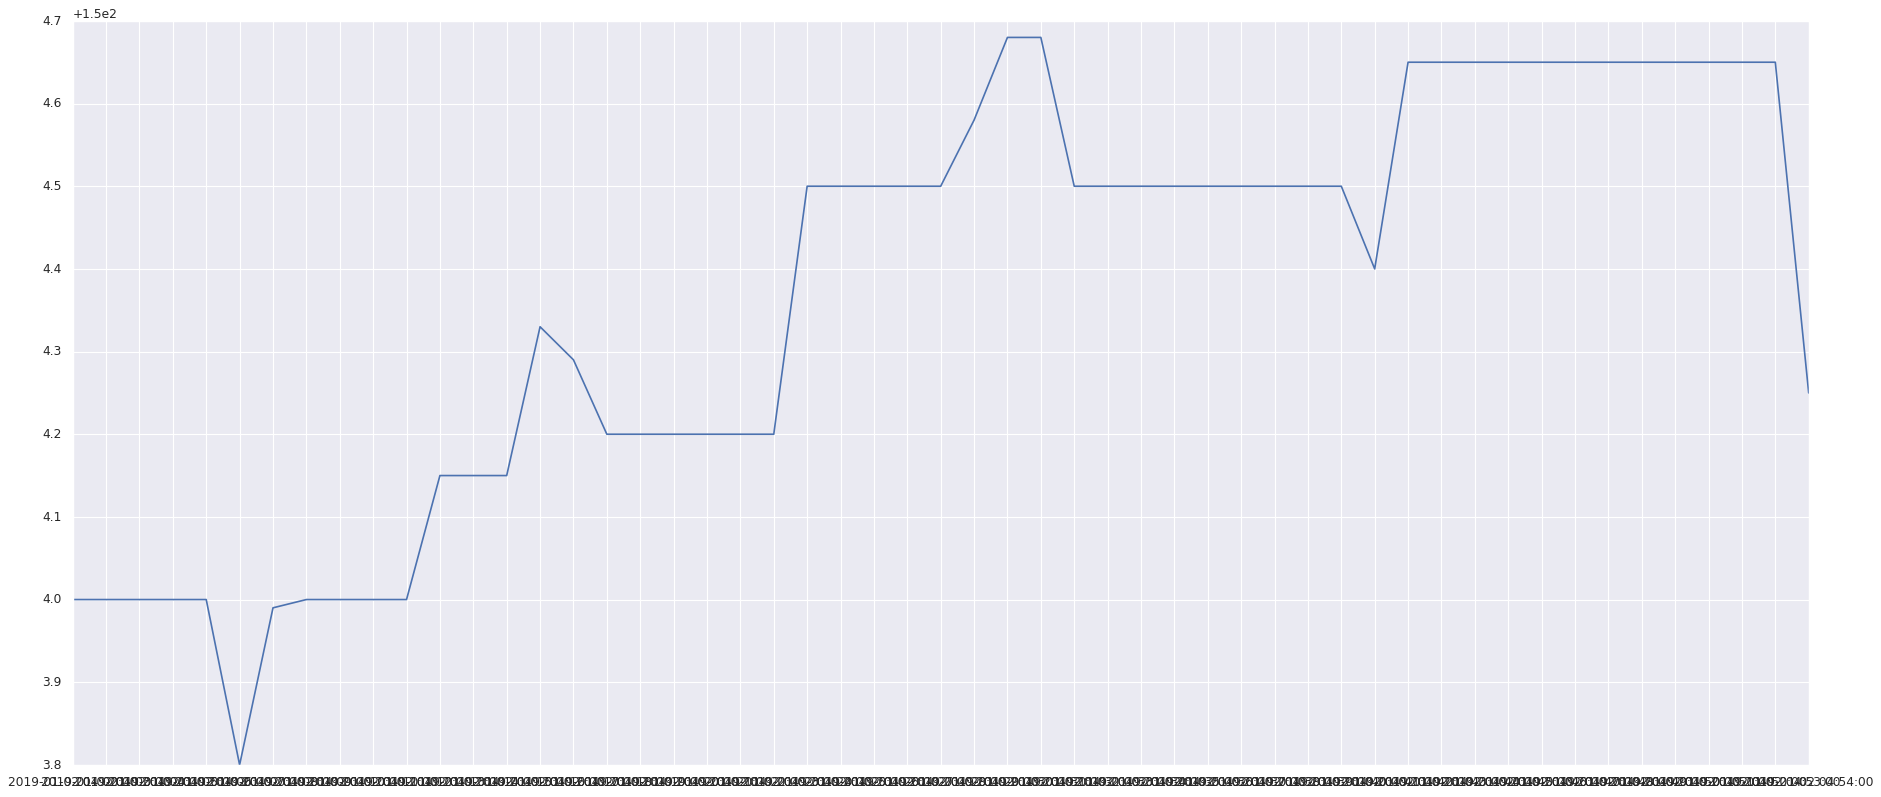

In [ ]:
df1min1 = df1min[(df1min['date_time'] > '2019-01-02 04:01:00') & (df1min['date_time'] < '2019-01-02 04:55:00')]
figure(figsize=(28, 12), dpi=80)

x = df1min1['date_time']
y = df1min1['price']
plt.plot(x, y) 
plt.grid(True)

plt.show()

In [ ]:
dfdollar = pd.read_csv(w2_files+"/AAPL_dollar_bars_3300000.csv")
dfdollar.shape
dfdollar.sort_values("date_time")
#dfdollar.head(10)




(140588, 6)

,date_time,open,high,low,close,volume
0,2019-01-02 05:02:28,154.40,154.70,153.01,154.62,21496
1,2019-01-02 06:59:20,154.62,154.70,154.10,154.65,21609
2,2019-01-02 07:16:04,154.65,155.10,154.46,154.82,21385
3,2019-01-02 07:31:54,154.82,155.35,154.80,154.81,21345
4,2019-01-02 07:57:11,154.81,155.00,154.56,154.61,21362
...,...,...,...,...,...,...
140583,2019-06-14 16:00:09,192.74,192.74,192.74,192.74,48053
140584,2019-06-14 16:00:23,192.74,192.94,192.74,192.94,17127
140585,2019-06-14 16:06:28,192.94,192.94,192.65,192.65,17530
140586,2019-06-14 16:19:48,192.65,192.74,192.55,192.74,18686


<Figure size 2240x960 with 0 Axes>

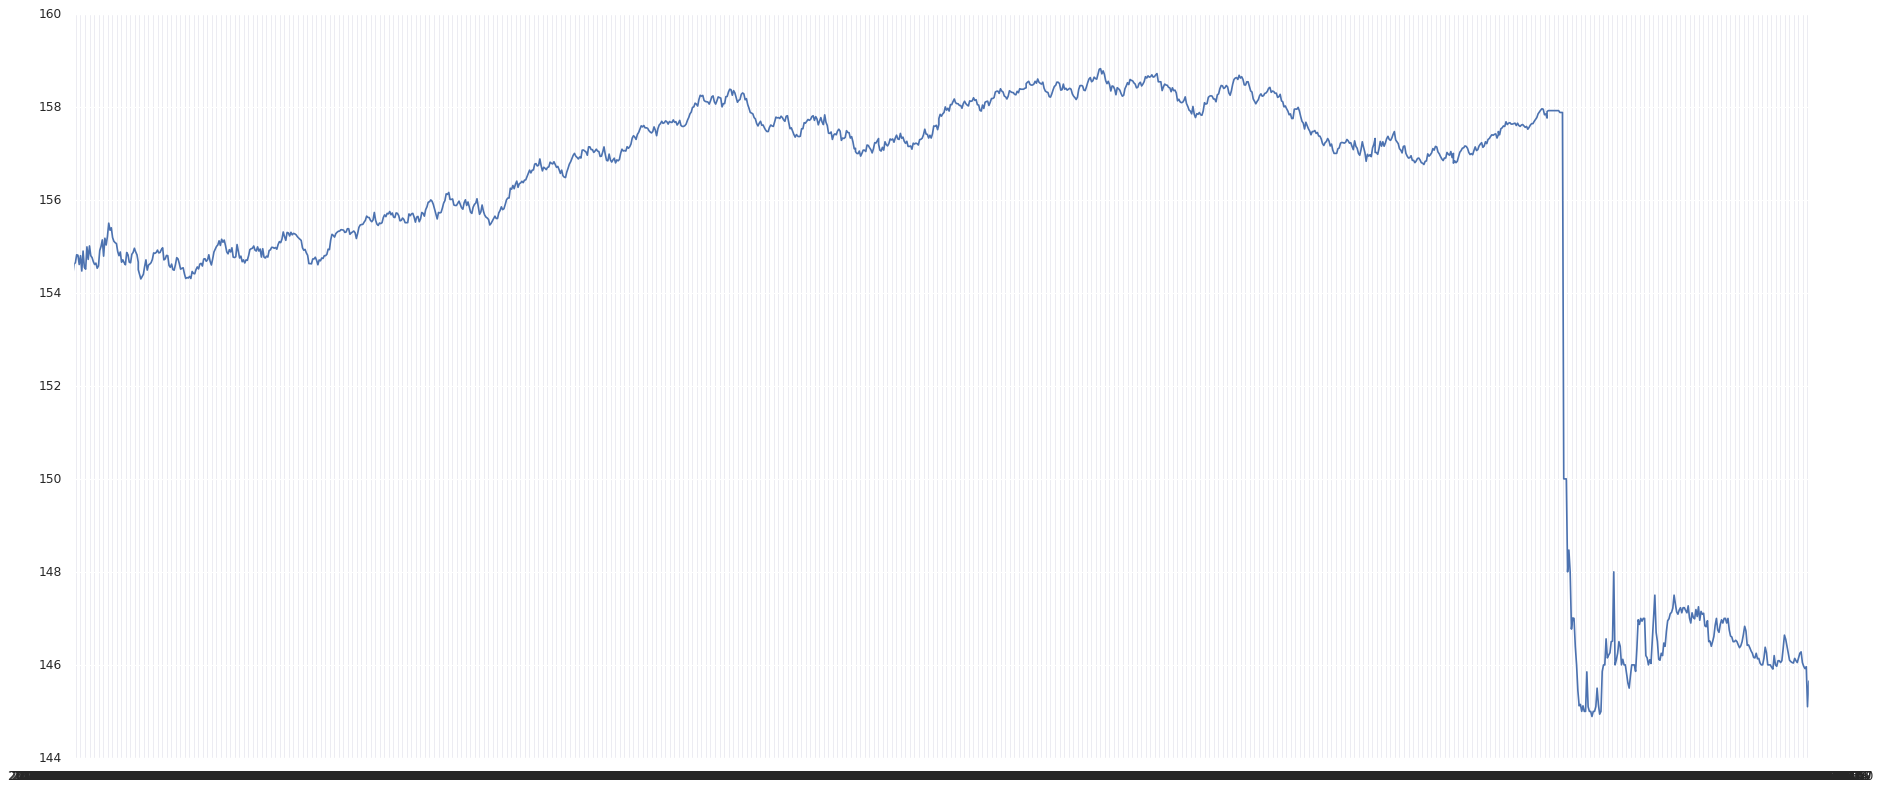

In [ ]:
dfdollar1 = dfdollar[(dfdollar['date_time'] > '2019-01-02 05:01:00') & (dfdollar['date_time'] < '2019-01-03 04:55:00')]
figure(figsize=(28, 12), dpi=80)

x = dfdollar1['date_time']
y = dfdollar1['open']
plt.plot(x, y) 
plt.grid(True)

plt.show()

## Question 2

<ipython-input-14-d450709a8f81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdollar2["dollar_change"] = dfdollar2["close"] - dfdollar2["open"]


<Figure size 2016x864 with 0 Axes>

Text(0.5, 0, 'date_time')

Text(0, 0.5, 'Dollar Change')

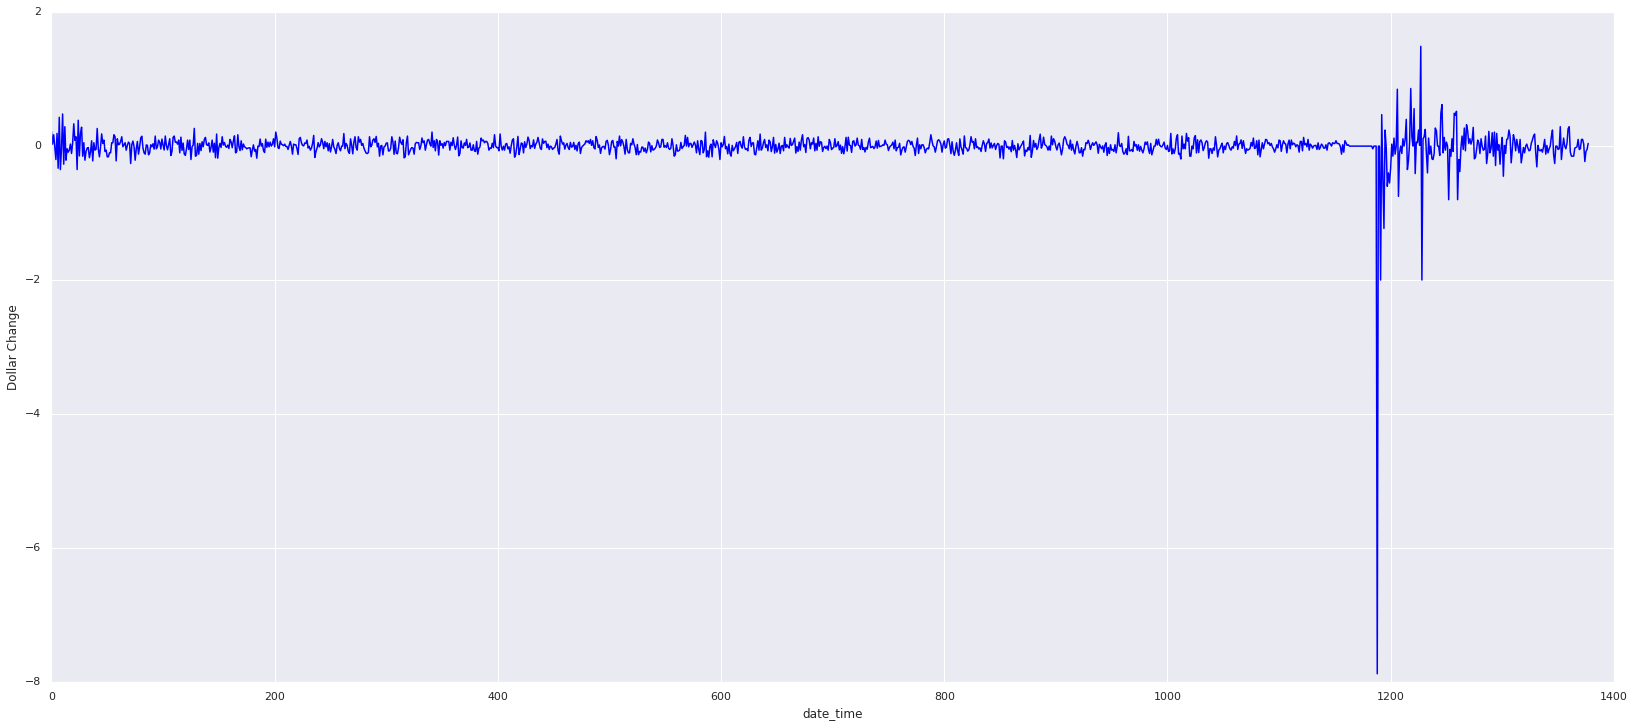

In [ ]:
dfdollar2 = dfdollar[(dfdollar['date_time'] > '2019-01-02 05:01:00') & (dfdollar['date_time'] < '2019-01-025 04:55:00')]

# Calculate dollar changes
dfdollar2["dollar_change"] = dfdollar2["close"] - dfdollar2["open"]

figure(figsize=(28, 12))

# Plot dollar change as bar chart
plt.plot(dfdollar2.index, dfdollar2["dollar_change"], color="blue")
plt.xlabel("date_time")
plt.ylabel("Dollar Change")
plt.show()

In [ ]:
dftick = pd.read_csv(w2_files+"/AAPL_tick_bars_100.csv")
dftick.shape
dftick.sort_values("date_time")
#dftick.head(10)


(135892, 6)

,date_time,open,high,low,close,volume
0,2019-01-02 05:23:40,154.40,154.70,153.01,154.70,22562
1,2019-01-02 06:57:25,154.70,154.70,154.10,154.46,18707
2,2019-01-02 07:10:23,154.46,154.90,154.45,154.86,15608
3,2019-01-02 07:21:40,154.86,155.18,154.70,154.80,16589
4,2019-01-02 07:33:07,154.80,155.35,154.80,154.81,14845
...,...,...,...,...,...,...
135887,2019-06-14 15:59:58,192.88,192.88,192.76,192.78,15884
135888,2019-06-14 15:59:59,192.78,192.85,192.74,192.74,25659
135889,2019-06-14 15:59:59,192.74,192.84,192.70,192.81,29201
135890,2019-06-14 16:00:05,192.81,192.84,192.68,192.74,1274259


In [ ]:
dfvol = pd.read_csv(w2_files+"/AAPL_volume_bars_22000.csv")
dfvol.shape
dfvol.sort_values("date_time")
#dfvol.head(10)


(118306, 6)

,date_time,open,high,low,close,volume
0,2019-01-02 05:02:28,154.40,154.70,153.01,154.69,22012
1,2019-01-02 06:59:49,154.69,154.70,154.10,154.46,22063
2,2019-01-02 07:18:04,154.46,155.18,154.46,155.18,22751
3,2019-01-02 07:33:47,155.18,155.35,154.80,154.83,22073
4,2019-01-02 07:58:04,154.83,155.00,154.50,154.60,22244
...,...,...,...,...,...,...
118301,2019-06-14 16:00:05,192.74,192.74,192.74,192.74,30363
118302,2019-06-14 16:00:09,192.74,192.74,192.74,192.74,48053
118303,2019-06-14 16:02:48,192.74,192.94,192.68,192.68,22597
118304,2019-06-14 16:19:48,192.68,192.74,192.55,192.74,30746


## Question 3

In [ ]:

dfdollar1.head(5)

close = dfdollar1.close
close.dtypes


,date_time,open,high,low,close,volume
0,2019-01-02 05:02:28,154.40,154.70,153.01,154.62,21496
1,2019-01-02 06:59:20,154.62,154.70,154.10,154.65,21609
2,2019-01-02 07:16:04,154.65,155.10,154.46,154.82,21385
3,2019-01-02 07:31:54,154.82,155.35,154.80,154.81,21345
4,2019-01-02 07:57:11,154.81,155.00,154.56,154.61,21362


dtype('float64')

In [ ]:
df1min.price.fillna(0) 

0         154.00
1         154.00
2         154.00
3         154.00
4         154.00
           ...  
235528    192.60
235529    192.60
235530    192.58
235531    192.58
235532    192.58
Name: price, Length: 235533, dtype: float64

In [ ]:
df1min.price.fillna(0) 
Oneminreturns = pd.Series(np.diff(df1min.price) / df1min.price[:-1])

# Compute the serial auto-correlation (at lag=1) of returns
corr1min = Oneminreturns.autocorr(lag=1)

print(corr1min)

0         154.00
1         154.00
2         154.00
3         154.00
4         154.00
           ...  
235528    192.60
235529    192.60
235530    192.58
235531    192.58
235532    192.58
Name: price, Length: 235533, dtype: float64

-0.058086648546708974


In [ ]:
dfdollar.close.fillna(0) 

dollarreturns = pd.Series(np.diff(dfdollar.close) / dfdollar.close[:-1])

# Compute the serial auto-correlation (at lag=1) of returns
corrdollar = dollarreturns.autocorr(lag=1)

print(corrdollar)

0         154.62
1         154.65
2         154.82
3         154.81
4         154.61
           ...  
140583    192.74
140584    192.94
140585    192.65
140586    192.74
140587    192.53
Name: close, Length: 140588, dtype: float64

-0.062186556069013466


In [ ]:
dftick.close.fillna(0) 

tickreturns = pd.Series(np.diff(dftick.close) / dftick.close[:-1])

# Compute the serial auto-correlation (at lag=1) of returns
corrtick = tickreturns.autocorr(lag=1)

print(corrtick)

0         154.70
1         154.46
2         154.86
3         154.80
4         154.81
           ...  
135887    192.78
135888    192.74
135889    192.81
135890    192.74
135891    192.65
Name: close, Length: 135892, dtype: float64

-0.00975974307760978


In [ ]:
dfvol.open.fillna(0) 

volreturns = pd.Series(np.diff(dfvol.close) / dfvol.close[:-1])

# Compute the serial auto-correlation (at lag=1) of returns
corrvol = volreturns.autocorr(lag=1)


print(corrvol)

0         154.40
1         154.69
2         154.46
3         155.18
4         154.83
           ...  
118301    192.74
118302    192.74
118303    192.74
118304    192.68
118305    192.74
Name: open, Length: 118306, dtype: float64

-0.052902163103490184


In [ ]:
x_data = list(range(4))
y_data = [corr1min, corrdollar, corrtick, corrvol]

print('---Correlations---')
print("1 min bar:               {0:.4f}".format(y_data[0]))
print("Dollar bar:              {0:.4f}".format(y_data[1]))

print("Tick bar:                {0:.4f}".format(y_data[2]))
print("Val bar:                 {0:.4f}".format(y_data[3]))

print("Highest Correlation:     {0:.4f}".format(max(y_data)))
print("Lowest Correlation:      {0:.4f}".format(min(y_data)))

---Correlations---
1 min bar:               -0.0581
Dollar bar:              -0.0622
Tick bar:                -0.0098
Val bar:                 -0.0529
Highest Correlation:     -0.0098
Lowest Correlation:      -0.0622


<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Bar Data')

Text(0, 0.5, 'Correlation')

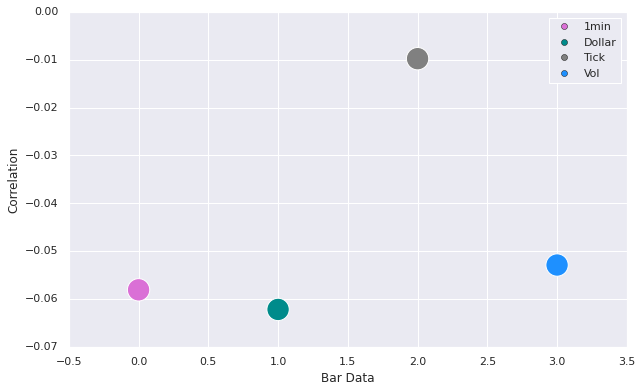

In [ ]:

plt.figure(figsize=(10,6))
colormap = ['orchid', 'darkcyan', 'grey', 'dodgerblue']

D_id_color = {'1min': u'orchid', 'Dollar': u'darkcyan', 'Tick': u'grey', 'Vol': u'dodgerblue'}

#colormap = [color for color in D_id_color.values()[:len(y_data)]]

plt.scatter(x=x_data,y=y_data, c=colormap, s=500)

plt.xlabel("Bar Data")
plt.ylabel("Correlation")
  
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in D_id_color.values()]
plt.legend(markers, D_id_color.keys(), numpoints=1)

## Question 4

In [ ]:
df1min.head(2)
dfdollar.head(2)
dftick.head(2)
dfvol.head(2)

,date_time,price,volume
0,2019-01-02 04:01:00,154.0,2520
1,2019-01-02 04:02:00,154.0,100


,date_time,open,high,low,close,volume
0,2019-01-02 05:02:28,154.40,154.7,153.01,154.62,21496
1,2019-01-02 06:59:20,154.62,154.7,154.10,154.65,21609


,date_time,open,high,low,close,volume
0,2019-01-02 05:23:40,154.4,154.7,153.01,154.70,22562
1,2019-01-02 06:57:25,154.7,154.7,154.10,154.46,18707


,date_time,open,high,low,close,volume
0,2019-01-02 05:02:28,154.40,154.7,153.01,154.69,22012
1,2019-01-02 06:59:49,154.69,154.7,154.10,154.46,22063


### QQ plot

<Figure size 1152x720 with 0 Axes>

((array([-4.53045095, -4.3394068 , -4.23575813, ...,  4.23575813,
          4.3394068 ,  4.53045095]),
  array([-0.08031925, -0.03066761, -0.02003551, ...,  0.01694589,
          0.02031048,  0.03585185])),
 (0.0002746152769455856, 1.0447986037466e-06, 0.6304641949596568))

Text(0.5, 1.0, 'One min bar returns')

((array([-4.42020495, -4.22461186, -4.11833888, ...,  4.11833888,
          4.22461186,  4.42020495]),
  array([-0.04991133, -0.03038596, -0.02149665, ...,  0.01383365,
          0.01575949,  0.03939093])),
 (0.00043046641496552625, 1.6963837333015773e-06, 0.8242838522975969))

Text(0.5, 1.0, 'Dollar bar returns')

((array([-4.412858  , -4.21695418, -4.11050154, ...,  4.11050154,
          4.21695418,  4.412858  ]),
  array([-0.04942966, -0.03260818, -0.02773309, ...,  0.01608273,
          0.0164067 ,  0.02585747])),
 (0.00042397535489265307, 1.7440551759513066e-06, 0.8340094214185003))

Text(0.5, 1.0, 'Tick bar returns')

((array([-4.38277084, -4.18558435, -4.0783895 , ...,  4.0783895 ,
          4.18558435,  4.38277084]),
  array([-0.04991133, -0.03247121, -0.02236195, ...,  0.0164067 ,
          0.01660218,  0.02581155])),
 (0.0004684935250060055, 2.0114795595234454e-06, 0.832706062026002))

Text(0.5, 1.0, 'Vol bar returns')

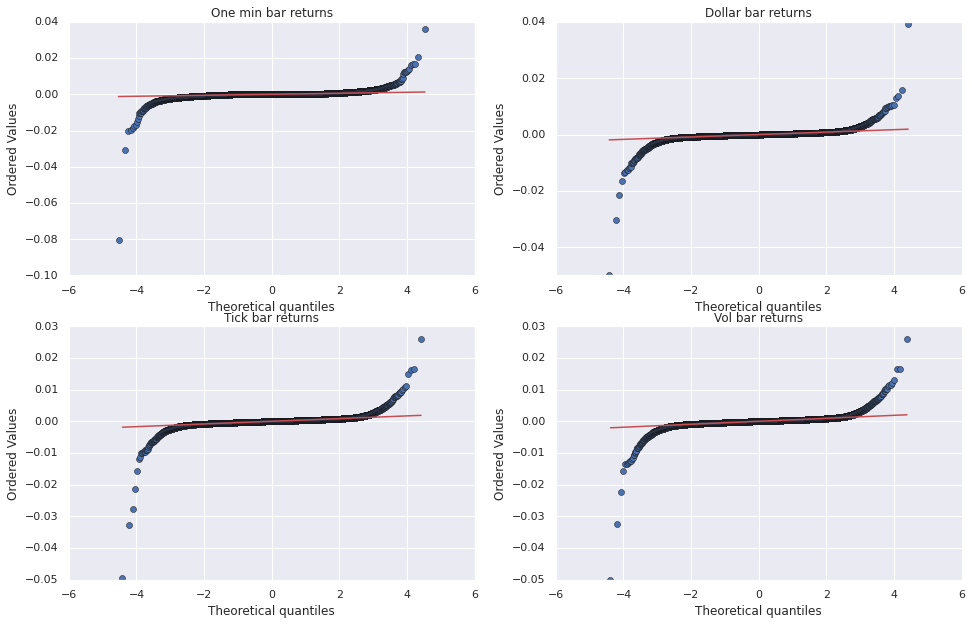

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
stats.probplot(Oneminreturns, dist="norm", plot=plt)
plt.title('One min bar returns')
#plt.show()

plt.subplot(2,2,2)
stats.probplot(dollarreturns, dist="norm", plot=plt)
#plt.show()
plt.title('Dollar bar returns')


plt.subplot(2,2,3)
stats.probplot(tickreturns, dist="norm", plot=plt)
#plt.show()
plt.title('Tick bar returns')


plt.subplot(2,2,4)
stats.probplot(volreturns, dist="norm", plot=plt)
#plt.show()
plt.title('Vol bar returns')



# Question 5

In [ ]:
from scipy import stats
from scipy.stats import jarque_bera



#The Jarque-Bera test is a goodness-of-fit test that determines 
#whether or not sample data have skewness and kurtosis that matches a normal distribution.  
#The smaller the value of the Jarque-Bera test the more normal the dataset.


test_statistic, p_value = jarque_bera(Oneminreturns)
print("One min bar, test statistics {} and p-value {}". format(test_statistic, p_value ))
test_statistic, p_value = jarque_bera(dollarreturns)

print("Dollar bar, test statistics {} and p-value {}". format(test_statistic, p_value ))

test_statistic, p_value = jarque_bera(tickreturns)
print("Tick bar, test statistics {} and p-value {}". format(test_statistic, p_value ))

test_statistic, p_value = jarque_bera(volreturns)
print("Vol bar, test statistics {} and p-value {}". format(test_statistic, p_value ))


One min bar, test statistics 285271969539.5042 and p-value 0.0
Dollar bar, test statistics 5815168267.099602 and p-value 0.0
Tick bar, test statistics 5506979839.155064 and p-value 0.0
Vol bar, test statistics 2753944592.2741103 and p-value 0.0


In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W2"
w2_files


total 59352
-rw------- 1 root root  7298524 Jan 22 00:25 AAPL_1Min.csv
-rw------- 1 root root  7936283 Jan 22 00:25 AAPL_dollar_bars_3300000.csv
-rw------- 1 root root 31287079 Jan 26 06:29 AAPL_raw_tick_data.bz2
-rw------- 1 root root  7577619 Jan 22 00:25 AAPL_tick_bars_100.csv
-rw------- 1 root root  6675366 Jan 22 00:25 AAPL_volume_bars_22000.csv


'/content/drive/My Drive/Colab_Notebooks/MSDS-451/W2'

In [ ]:
df5 = pd.read_pickle(w2_files+"/AAPL_raw_tick_data.bz2")


In [ ]:
df5.shape
df5.head(10)

(13589216, 3)

,date_time,price,volume
0,2019-01-02 04:00:00,154.40,260
1,2019-01-02 04:00:00,154.40,242
2,2019-01-02 04:00:00,154.40,218
3,2019-01-02 04:00:00,154.40,100
4,2019-01-02 04:00:00,154.40,200
5,2019-01-02 04:00:04,154.00,100
6,2019-01-02 04:00:12,153.01,100
7,2019-01-02 04:00:12,153.01,200
8,2019-01-02 04:00:12,153.01,100
9,2019-01-02 04:00:30,153.88,100


In [ ]:
dfof = df5.copy()

#direction of each trade
#dfof['direction'] = np.where(dfof['price'] > dfof['price'].shift(1), 1, -1)

#dfof['order_flow'] = dfof['direction'].cumsum()

#plot
##plt.plot(dfof['order_flow'])
#plt.show()

<Figure size 1152x720 with 0 Axes>

,date_time,price,volume,cumulative_price,order_flow,flow_direction
0,2019-01-02 04:00:00,154.40,260,0.00,0.00,
1,2019-01-02 04:00:00,154.40,242,154.40,0.00,neutral
2,2019-01-02 04:00:00,154.40,218,308.80,0.00,neutral
3,2019-01-02 04:00:00,154.40,100,463.20,0.00,neutral
4,2019-01-02 04:00:00,154.40,200,617.60,0.00,neutral
5,2019-01-02 04:00:04,154.00,100,771.60,-0.40,sell
6,2019-01-02 04:00:12,153.01,100,924.61,-0.99,sell
7,2019-01-02 04:00:12,153.01,200,1077.62,0.00,neutral
8,2019-01-02 04:00:12,153.01,100,1230.63,0.00,neutral
9,2019-01-02 04:00:30,153.88,100,1384.51,0.87,buy


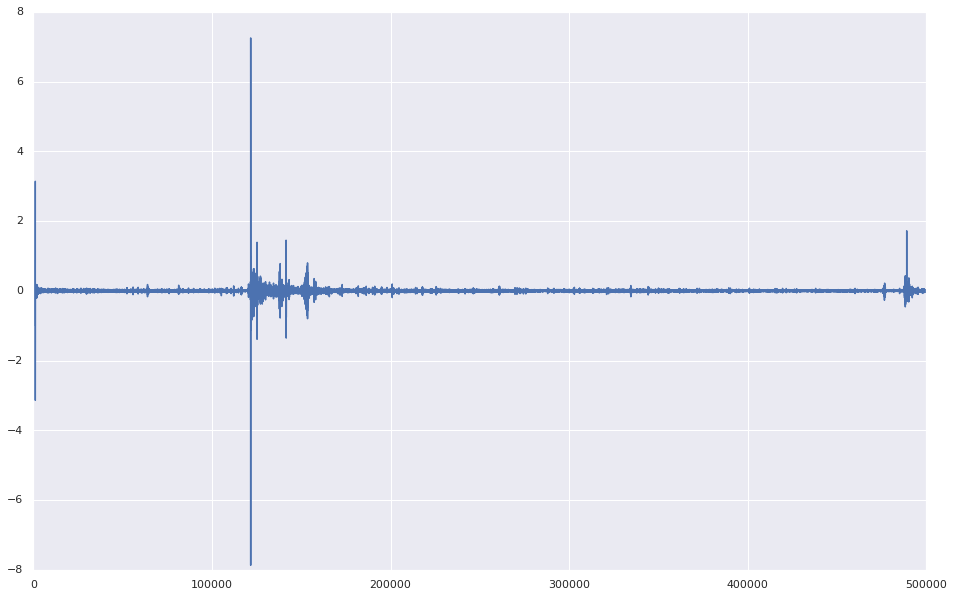

In [ ]:
df = df5.head(500000).copy()

df["cumulative_price"] = 0

# Iterate dataframe
for i in range(1, len(df)):
    # Calculate cumulative price at each price level
    df.loc[i, "cumulative_price"] = df.loc[i-1, "cumulative_price"] + df.loc[i, "price"] #* df.loc[i, "volume"]

df["order_flow"] = 0

# Iterate dataframe
for i in range(1, len(df)):
  #direction of each trade
  #df['direction'] = np.where(df['price'] > df['price'].shift(1), 1, -1)

  # Calculate order flow as difference between cumulative price at current and previous price level
  df.loc[i, "order_flow"] = df.loc[i, "price"] - df.loc[i-1, "price"]

# Add column to store direction of the flow
df["flow_direction"] = ""

# Iterate dataframe
for i in range(1, len(df)):
    # s+ means "buy"
    if df.loc[i, "order_flow"] > 0:
        df.loc[i, "flow_direction"] = "buy"
    # s- means "sell"
    elif df.loc[i, "order_flow"] < 0:
        df.loc[i, "flow_direction"] = "sell"
    # No change
    else:
        df.loc[i, "flow_direction"] = "neutral"

plt.figure(figsize=(16,10))

df.head(10)
plt.plot(df['order_flow'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date_time         500000 non-null  datetime64[ns]
 1   price             500000 non-null  float64       
 2   volume            500000 non-null  int64         
 3   cumulative_price  500000 non-null  float64       
 4   order_flow        500000 non-null  float64       
 5   flow_direction    500000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 22.9+ MB
None


Text(0.5, 0, 'Month')

Text(0, 0.5, 'Close Price')

Text(0.5, 1.0, 'Apple Stock Price Over Time')

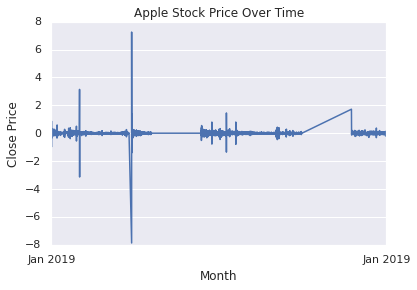

In [ ]:
df.date_time = pd.to_datetime(df.date_time)
print(df.info())


import matplotlib.dates as mdates

# Load the data into a pandas dataframe

# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['date_time'])

# Plot the data
plt.plot(df['Date'], df['order_flow'])

# Add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title('Apple Stock Price Over Time')

# Format the x-axis to display only the month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Show the plot
plt.show()




In [ ]:
dfof1 = df5.head(100000).copy()
dfof1["cumulative_volume"] = 0
# Iterate through rows of dataframe
for i in range(1, len(dfof)):
    # Calculate cumulative volume at each price
    dfof1.loc[i, "cumulative_volume"] = dfof1.loc[i-1, "cumulative_volume"] + dfof1.loc[i, "volume"]

# Create empty column for order flow
dfof1["order_flow"] = 0

# Iterate through rows of dataframe
for i in range(1, len(dfof1)):
    # Calculate order flow as difference between cumulative volume at current and previous price
    dfof1.loc[i, "order_flow"] = dfof1.loc[i, "cumulative_volume"] - dfof1.loc[i-1, "cumulative_volume"]

# Print updated dataframe
df.head(10)
plt.plot(df['order_flow'])
plt.show()

KeyboardInterrupt: ignored

In [ ]:
df['price'].min()
print()
df['price'].max()

153.01

158.27